In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('dataset/abalone.csv',names=['Sex','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight', 'Rings'])
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
df.shape

(4177, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [28]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [29]:
df['Sex'] = df['Sex'].map({'M':0,'F':1,'I':2})

In [30]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [118]:
# # df['n_w'] = df['Whole_weight'] - (df['Viscera_weight'] + df['Shell_weight'])
# df.drop('n_w', axis =1 , inplace=True)
# df.head()

,Shucked_weight,Shell_weight,Rings,abc,VW
0,0.2245,0.150,15,0.915,0.4130
1,0.0995,0.070,7,0.705,0.1770
2,0.2565,0.210,9,1.085,0.5355
3,0.2155,0.155,10,0.930,0.4020
4,0.0895,0.055,7,0.665,0.1655


In [119]:
df['abc'] = df['Diameter']+ ((df['Length'])+ df['Height'])
df.head() 

KeyError: 'Diameter'

In [120]:
df.drop(columns=['Diameter','Length','Height'], axis = 1, inplace=True)

KeyError: "['Diameter', 'Length', 'Height'] not found in axis"

In [115]:
df['VW'] = ( df['Whole_weight'] -df['Viscera_weight'] )
df.drop(columns=['Whole_weight','Viscera_weight'], axis =1, inplace=True)

In [121]:
df.corr()['Rings'].sort_values()

Shucked_weight    0.420884
VW                0.544175
abc               0.578377
Shell_weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [43]:
df.corr()['Whole_weight'].loc[['Shucked_weight','Viscera_weight']]

Shucked_weight    0.969405
Viscera_weight    0.966375
Name: Whole_weight, dtype: float64

<Axes: >

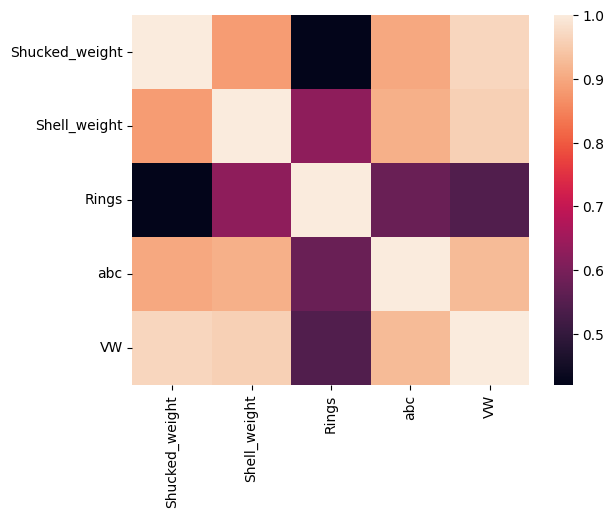

In [123]:
import seaborn as sns

sns.heatmap(df.corr())

- Sex is no where related to rings

In [32]:
# Dropping the Sex column

df.drop('Sex',axis=1,inplace=True)
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [124]:
# Splitting into train and test sets

from sklearn.model_selection import train_test_split

X = df.drop('Rings',axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 4), (836, 4), (3341,), (836,))

In [126]:
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error
import math
    
def evaluate(y_true: np.array, y_pred: np.array)-> np.float64:
    """
    Evaluates the performance of the model
    """

    # return mean_squared_log_error(y_true, y_pred, squared=False)

    mse = mean_squared_error(y_true, y_pred)
    
    # # rmsle = math.sqrt(msle)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [127]:
# Building Models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [18]:
type(np.array(y_train))

numpy.ndarray

In [130]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)



# print(evaluate(np.array(y_train), lr_train_pred))

RMSLE, R2  = evaluate(y_train, lr_train_pred)
print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))
# print("TRAINING SCORE | RMSLE: {} ".format(RMSLE))

lr_test_pred = lr.predict(X_test)
RMSLE, R2 = evaluate(y_test, lr_test_pred)
print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))

TRAINING SCORE | MSE: 4.993182158352215 | R2: 0.5200104120556375
TRAINING SCORE | RMSLE: 4.76330407103483 | R2: 0.5393490824727518


In [131]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)

RMSLE, R2 = evaluate(y_train, dt_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

dt_test_pred = dt.predict(X_test)

RMSLE, R2 = evaluate(y_test, dt_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


TRAINING SCORE | MSE: 0.0 | R2: 1.0
TRAINING SCORE | RMSLE: 8.720095693779903 | R2: 0.15669459216521509


In [146]:
rf = RandomForestRegressor(n_estimators=900, max_depth=100)    

rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)

RMSLE, R2 = evaluate(y_train, rf_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

rf_test_pred = rf.predict(X_test)

RMSLE, R2 = evaluate(y_test, rf_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


TRAINING SCORE | MSE: 0.658299756486008 | R2: 0.936718305313366
TRAINING SCORE | RMSLE: 4.982092007797271 | R2: 0.5181904786316965


In [143]:
gb = GradientBoostingRegressor(n_estimators=75)    

gb.fit(X_train, y_train)

gb_train_pred = gb.predict(X_train)

RMSLE, R2 = evaluate(y_train, gb_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

gb_test_pred = gb.predict(X_test)

RMSLE, R2 = evaluate(y_test, gb_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


TRAINING SCORE | MSE: 3.9178509516769457 | R2: 0.6233809213675007
TRAINING SCORE | RMSLE: 4.665633288755555 | R2: 0.5487946552939674


In [134]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)

RMSLE, R2 = evaluate(y_train, xgb_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

xgb_test_pred = xgb.predict(X_test)

RMSLE, R2 = evaluate(y_test, xgb_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))

TRAINING SCORE | MSE: 0.9534294839511338 | R2: 0.9083477809095725
TRAINING SCORE | RMSLE: 5.598553835275433 | R2: 0.4585735190142842


In [152]:
cat = CatBoostRegressor(iterations=2000)

cat.fit(X_train, y_train)

cat_train_pred = cat.predict(X_train)

RMSLE, R2 = evaluate(y_train, cat_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

cat_test_pred = cat.predict(X_test)

RMSLE, R2 = evaluate(y_test, cat_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


Learning rate set to 0.028198
0:	learn: 3.1909038	total: 2.64ms	remaining: 5.27s
1:	learn: 3.1569553	total: 7.2ms	remaining: 7.19s
2:	learn: 3.1247386	total: 9.4ms	remaining: 6.26s
3:	learn: 3.0916291	total: 11.3ms	remaining: 5.63s
4:	learn: 3.0629704	total: 13.2ms	remaining: 5.25s
5:	learn: 3.0334479	total: 15.5ms	remaining: 5.16s
6:	learn: 3.0053226	total: 17.1ms	remaining: 4.88s
7:	learn: 2.9770216	total: 19.8ms	remaining: 4.92s
8:	learn: 2.9517349	total: 21.7ms	remaining: 4.8s
9:	learn: 2.9255304	total: 23.6ms	remaining: 4.7s
10:	learn: 2.9005808	total: 26.8ms	remaining: 4.84s
11:	learn: 2.8787718	total: 28.9ms	remaining: 4.78s
12:	learn: 2.8581770	total: 32.2ms	remaining: 4.92s
13:	learn: 2.8346854	total: 34.6ms	remaining: 4.91s
14:	learn: 2.8153292	total: 36.8ms	remaining: 4.88s
15:	learn: 2.7949107	total: 39.1ms	remaining: 4.85s
16:	learn: 2.7756603	total: 87.7ms	remaining: 10.2s
17:	learn: 2.7602669	total: 89.5ms	remaining: 9.85s
18:	learn: 2.7415348	total: 91.2ms	remaining: 9.

___________________

In [157]:
test_df = pd.read_csv('dataset/test.csv')
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [158]:
['Sex','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight', 'Rings']

test_df.rename(columns = {'Whole weight':'Whole_weight'}, inplace=True)
test_df.rename(columns = {'Whole weight.1':'Shucked_weight'}, inplace=True)
test_df.rename(columns = {'Whole weight.2':'Viscera_weight'}, inplace=True)
test_df.rename(columns = {'Shell weight':'Shell_weight'}, inplace=True)

In [160]:
# test_df.head()
test_df['Sex'] = test_df['Sex'].map({'M':0,'F':1,'I':2})

In [163]:
test_df['abc'] = test_df['Diameter']+ ((test_df['Length'])+ test_df['Height'])
test_df.drop(columns=['Diameter','Length','Height'], axis = 1, inplace=True)

test_df['VW'] = ( test_df['Whole_weight'] -test_df['Viscera_weight'] )
test_df.drop(columns=['Whole_weight','Viscera_weight'], axis =1, inplace=True)

In [164]:
id = test_df['id']
test_df = test_df.drop(columns=['id','Sex'], axis=1)

KeyError: 'id'

In [165]:
id.head()

0    90615
1    90616
2    90617
3    90618
4    90619
Name: id, dtype: int64

In [166]:
test_df.head()

,Shucked_weight,Shell_weight,abc,VW
0,0.6185,0.3005,1.275,0.9255
1,0.4785,0.2750,1.200,0.7635
2,0.3525,0.2405,1.120,0.6550
3,0.3525,0.2350,1.205,0.6875
4,0.1575,0.1050,0.850,0.2910


In [167]:
y_sub = cat.predict(test_df)
y_sub.round()

array([10.,  9., 11., ..., 16., 12.,  8.])

In [168]:
y_sub = y_sub.round()

In [169]:
y_df = pd.DataFrame()

In [170]:
y_df['id'] = id

In [171]:
y_df['Rings'] = y_sub

In [172]:
y_df

,id,Rings
0,90615,10.0
1,90616,9.0
2,90617,11.0
3,90618,10.0
4,90619,8.0
...,...,...
60406,151021,7.0
60407,151022,10.0
60408,151023,16.0
60409,151024,12.0


In [132]:
y_df.to_csv('result.csv', index=None)